In [1]:
import requests
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt

## Json

In [53]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=COFFEE&interval=monthly&apikey=26B3CDZ7KYBASZXV'
r = requests.get(url)
data = r.json()

#print(data)

In [102]:
data_coffe = data["data"]
data_coffe

[{'date': '2023-09-01', 'value': '183.589047619048'},
 {'date': '2023-08-01', 'value': '186.346956521739'},
 {'date': '2023-07-01', 'value': '193.494285714286'},
 {'date': '2023-06-01', 'value': '207.385'},
 {'date': '2023-05-01', 'value': '220.121304347826'},
 {'date': '2023-04-01', 'value': '229.9555'},
 {'date': '2023-03-01', 'value': '222.663913043478'},
 {'date': '2023-02-01', 'value': '229.506'},
 {'date': '2023-01-01', 'value': '206.76'},
 {'date': '2022-12-01', 'value': '210.388636363636'},
 {'date': '2022-11-01', 'value': '213.718181818182'},
 {'date': '2022-10-01', 'value': '240.082380952381'},
 {'date': '2022-09-01', 'value': '267.492272727273'},
 {'date': '2022-08-01', 'value': '268.48347826087'},
 {'date': '2022-07-01', 'value': '255.906666666667'},
 {'date': '2022-06-01', 'value': '273.763636363636'},
 {'date': '2022-05-01', 'value': '260.449545454545'},
 {'date': '2022-04-01', 'value': '265.397619047619'},
 {'date': '2022-03-01', 'value': '258.99347826087'},
 {'date': '2

In [128]:
df = pd.DataFrame(data_coffe)
df1 = df.set_index(df['date'])
df2 = df1.drop('date',axis =1)
df2 = df2[df2['value'] != '.']
df2.tail()


,value
date,
1990-05-01,92.0199890136719
1990-04-01,93.7300109863281
1990-03-01,93.9599914550781
1990-02-01,84.010009765625
1990-01-01,75.8299865722656


In [153]:
df2['value'] = df2['value'].astype(float)

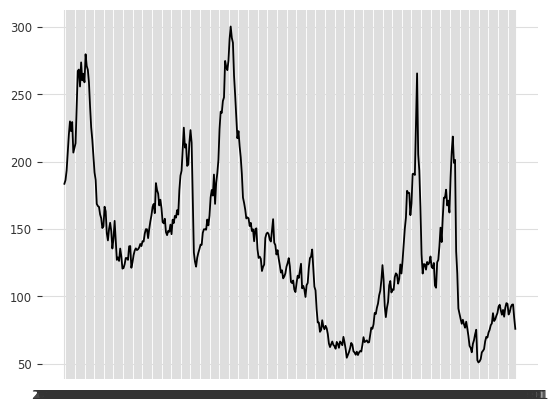

In [154]:
plt.plot(df2['value'])

## Csv

In [30]:
dataaa = pd.read_csv('coffee.csv',index_col='Date',parse_dates=['Date'])
dataaa = dataaa.drop('Currency',axis =1)

dataaa.head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03,122.25,124.00,116.10,116.50,6640
2000-01-04,116.25,120.50,115.75,116.25,5492
2000-01-05,115.00,121.00,115.00,118.60,6165
2000-01-06,119.00,121.40,116.50,116.85,5094
2000-01-07,117.25,117.75,113.80,114.15,6855
2000-01-10,123.50,126.00,116.70,117.55,7499
2000-01-11,115.50,118.25,115.50,117.80,3976
2000-01-12,117.80,120.50,116.90,118.95,5184
2000-01-13,119.25,120.00,117.50,118.55,3717


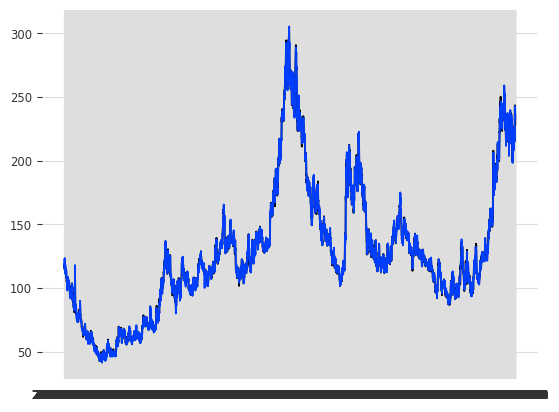

In [161]:
plt.plot(dataaa['Close'])
plt.plot(dataaa['Open'])

### Time Series Analysis

In [58]:
from darts import TimeSeries
# Converting the Date index to datetime type
#dataaa.reset_index(drop=True, inplace=True)
# Creating a Darts TimeSeries object from the DataFrame
series = TimeSeries.from_dataframe(dataaa,value_cols= "Close")
#dataaa.head()


In [71]:
train, val = series[:-100], series[-100:]

from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=3000)

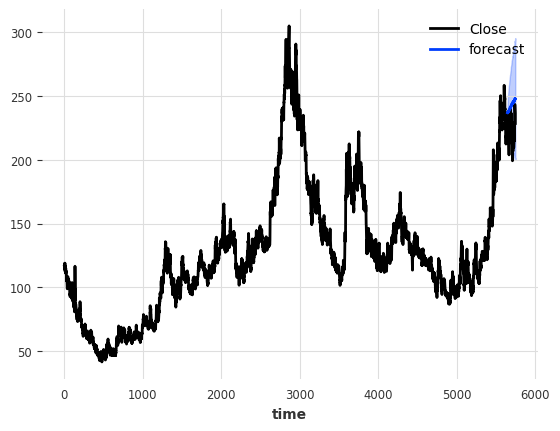

In [72]:
import matplotlib.pyplot as plt

series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

### Linear Regression

In [74]:
df = dataaa.copy()

df['Time'] = np.arange(len(dataaa.index))

df.head()

from sklearn.linear_model import LinearRegression

# Training data
X = df.loc[:, ['Time']]  # features
y = df.loc[:, 'Close']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

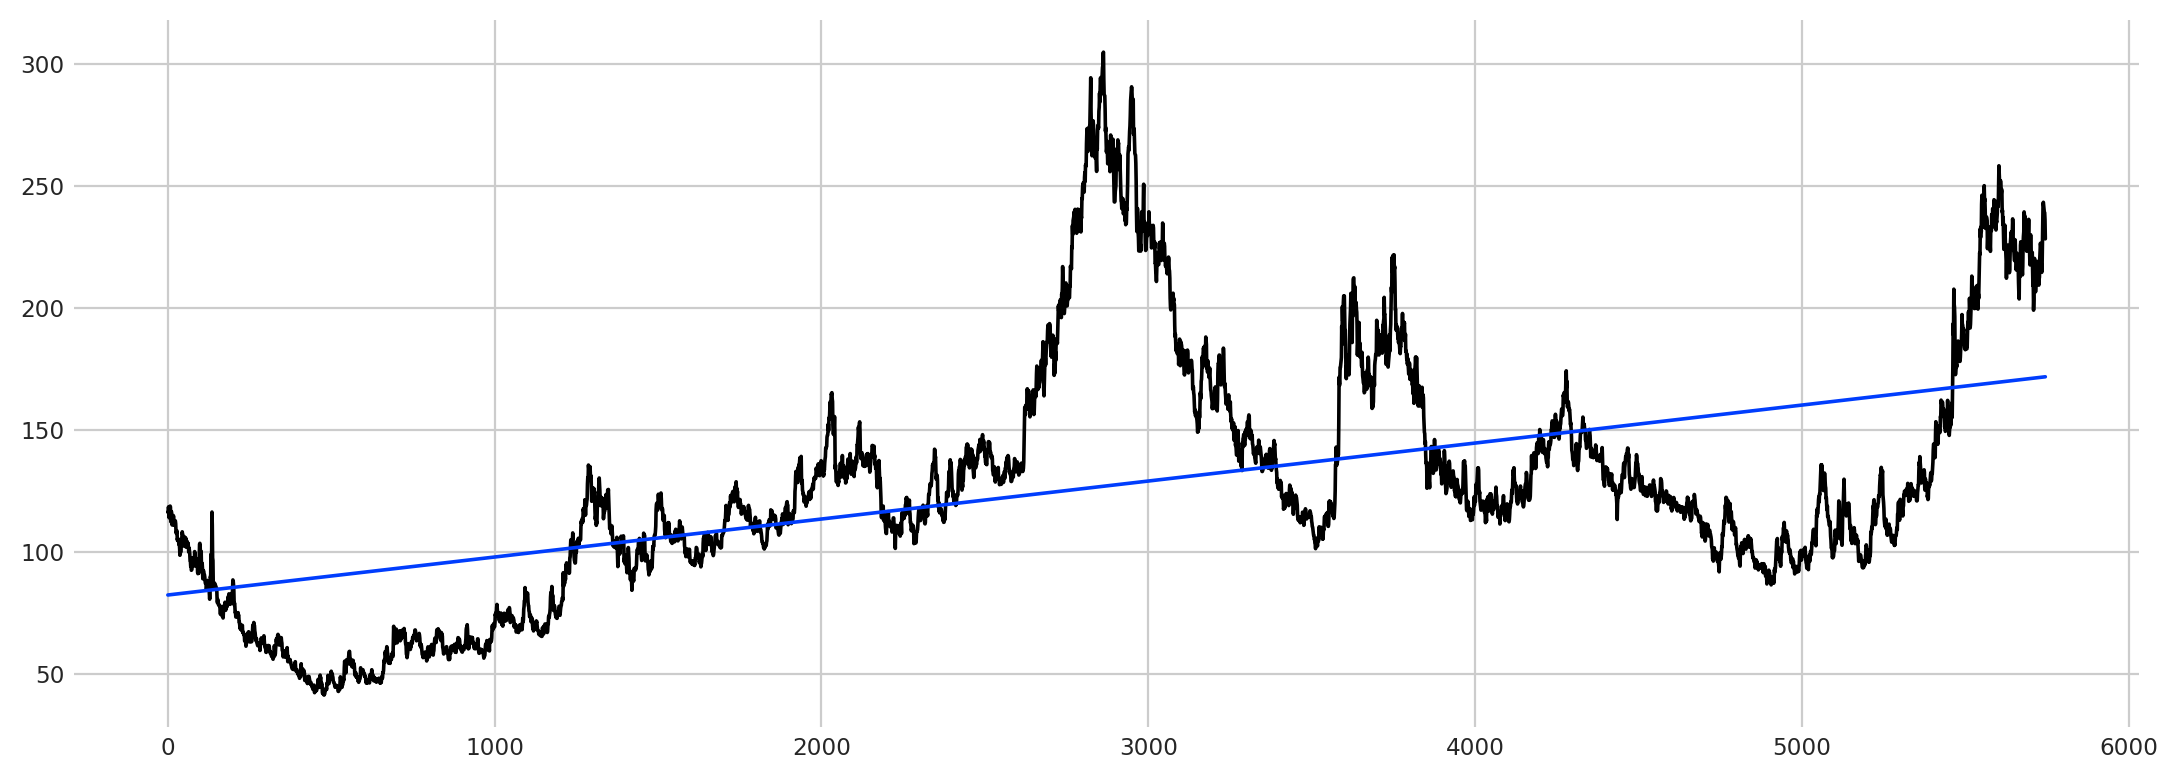

In [87]:
plt.plot(np.array(df['Time']),np.array(df['Close']))
plt.plot(y_pred)

### Hidden Markov Chain

In [109]:
import numpy as np
import pandas as pd
from hmmlearn import hmm
from sklearn.preprocessing import StandardScaler

# Simulated data: Replace this with your actual coffee price and volume data
#price = np.random.rand(100)
#volume = np.random.rand(100)
data = pd.DataFrame({'Price': dataaa["Close"], 'Volume': dataaa["Volume"]})

# Data Preprocessing: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Create and train Gaussian HMM
model = hmm.GaussianHMM(n_components=3, covariance_type='diag', n_iter=10000000)
model.fit(data_scaled)

# Predict the optimal sequence of internal hidden states
hidden_states = model.predict(data_scaled)

# Initialize an empty list to store signals
signals = ['Hold']  # Initialize with 'Hold' for the first data point

# Loop through hidden_states to generate signals
for i in range(1, len(hidden_states)):
    if hidden_states[i] == 1 and hidden_states[i-1] == 0:
        signals.append('Sell')
    elif hidden_states[i] == 0 and hidden_states[i-1] == 1:
        signals.append('Buy')
    else:
        signals.append('Hold')

# Add signals to your DataFrame
data['Signal'] = signals

# Print the signals
print('Generated Signals:', data['Signal'].values)

Generated Signals: ['Hold' 'Hold' 'Hold' ... 'Hold' 'Hold' 'Hold']


(array([   0.,    0.,    0.,    0.,    0., 5746.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

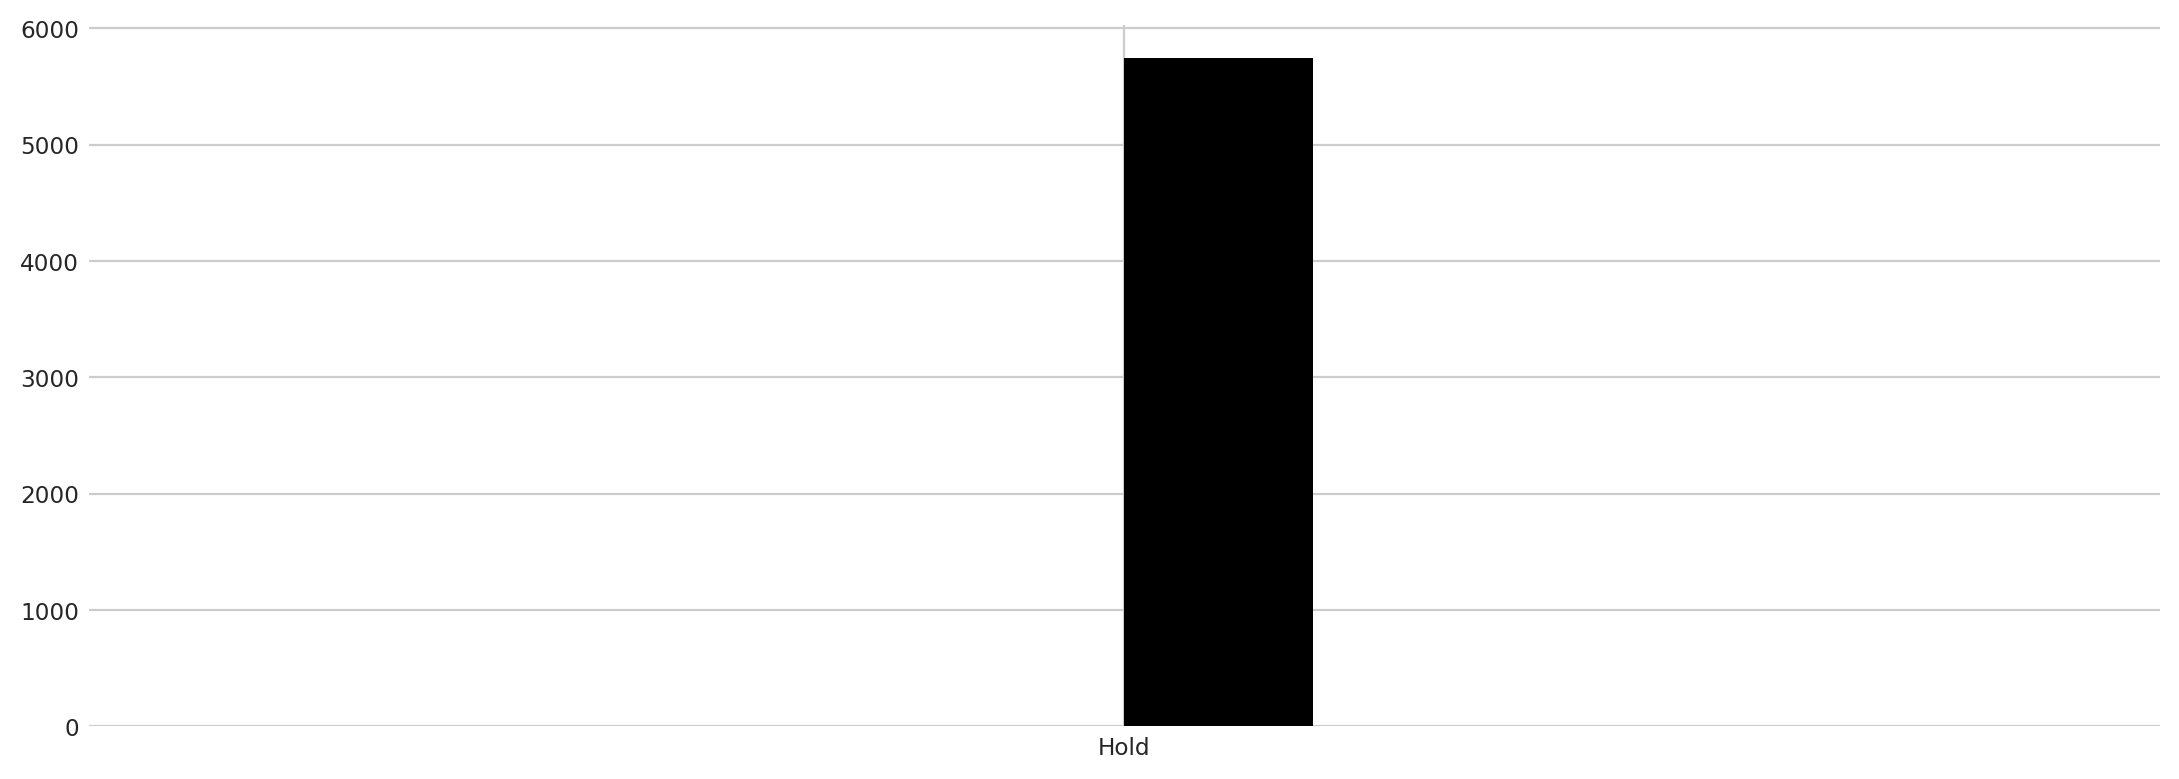

In [110]:
plt.hist(data["Signal"])

In [111]:
data[data["Signal"] == "Sell"]

,Price,Volume,Signal
time,,,


In [108]:
data[38:42]

,Price,Volume,Signal
time,,,
38,101.65,473,Hold
39,99.90,287,Hold
40,101.15,166,Buy
41,105.10,198,Hold
